In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from matplotlib.colors import ListedColormap

<h1><center>Tree Ensemble Modeling on Iris </center></h1>
<h5><center>Matthew Xu</center></h5>

In [23]:
#Loading Iris
iris = load_iris()

# Loading Iris data, target variable, feature names
data = iris.data 
target = iris.target 
names = iris.target_names
feature_names  = iris.feature_names

In [24]:
# Changing dataset to pandas dataframe 
df = pd.DataFrame(data, columns=iris.feature_names)
df['species'] = iris.target

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The species target variable has been converted numerically in respect to the catergoies: 'setosa' 'versicolor' 'virginica'.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [27]:
# Feature variable to X
X = df.drop('species',axis=1)

# Response variable to y
y = df['species']

print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


This is to convert the data into a feature variable pandas data frame (X) and a target variable data frame (y)

In [28]:
# Split Dataset into xtrain, xtest, ytrain, ytest with test size 35% and training size 65%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = 42)

<h3>Decision Tree</h3>

In [29]:
# Creating Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
# Fitting classifier to training data
tree.fit(X_train, y_train)
# Predicting on Xtest set
y_pred_tree = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [30]:
# Tree classfication report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [31]:
# Tree accuracy score
print(tree_accuracy)

0.9811320754716981


In [32]:
# Visual Tree Structure
def drawTree(tree): 
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data,
                feature_names=iris.feature_names, filled=True,rounded=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

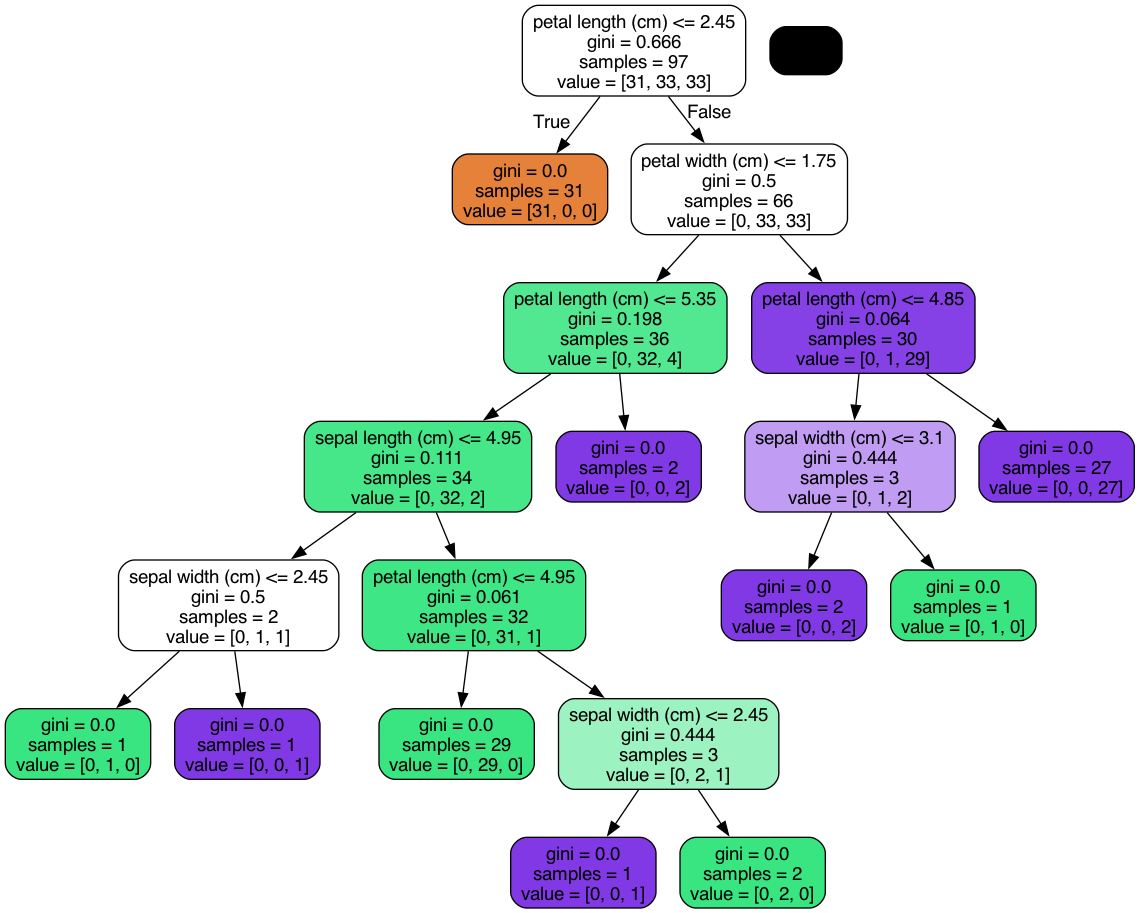

In [33]:
drawTree(tree)

<h3>Hyperparameter Tuning</h3>

In [34]:
# Parameter grid 
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

# Grid search model on the decision tree classifier
iristree = DecisionTreeClassifier(random_state = 100)
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid, 
                          cv = 5)

# Fit to training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)})

In [35]:
# Print the best score and the best estimator from grid search
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9394736842105263
DecisionTreeClassifier(max_depth=3, min_samples_split=26, random_state=100)


In [36]:
# Final best tree model
finaltree = DecisionTreeClassifier(random_state = 100, max_depth=4, min_samples_leaf=3,)
finaltree.fit(X_train, y_train)
y_pred_finaltree = finaltree.predict(X_test)
final_tree_accuracy = accuracy_score(y_test, y_pred_finaltree)

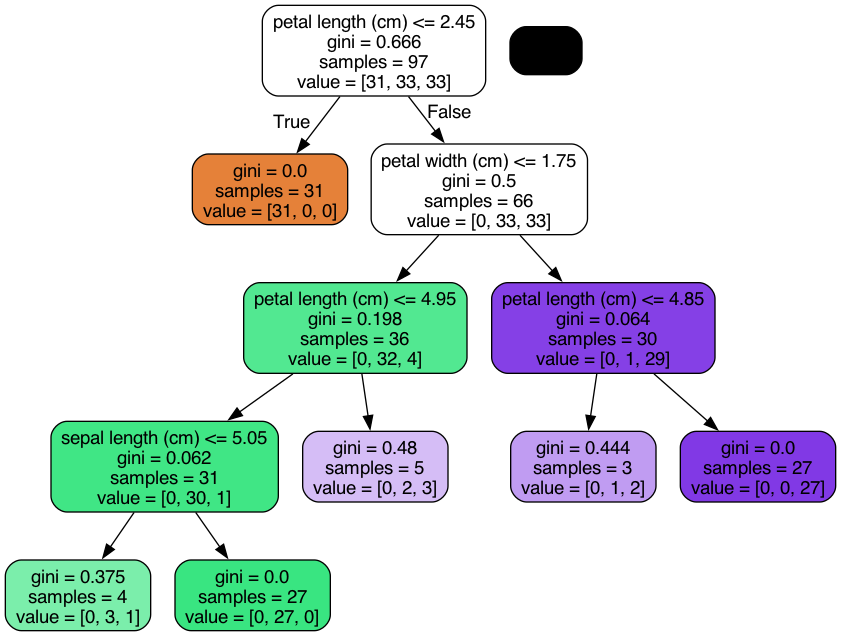

In [37]:
# Visual of Final Tree Structure
drawTree(finaltree)

In comparison to the previous tree, this tree potentially reduces the liklihood of overfitting the model, having a smaller depth and reducing splitting into an irrelevant feature. The likelihood of over-fitting occurring increases as a tree gets deeper because the resulting classifications are based on smaller and smaller subsets as the dataset is partitioned after each feature test in the path.

In [38]:
# Final Tree Accurcy
print(final_tree_accuracy)

1.0


As shown above, after hyperparameter tuning, the final tree accuracy is an improvement over the old from 0.9811320754716981 to 1.0

<h3>Bagging Model</h3>

In [39]:
# Hypertuning Parameters
bagging_params = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 1.0]}

# Grid Search on Bagging Classifier
bagging_cl = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=42), bagging_params, cv=5)

# Fit to training data
bagging_cl.fit(X_train, y_train)

# Predict on Xtest
y_pred_bagging = bagging_cl.predict(X_test)

# Accuracy score
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

In [47]:
drawTree(BaggingClassifier(DecisionTreeClassifier()))

NotFittedError: This BaggingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<h3>Random Forest</h3>

In [40]:
# Hypertuning Parameters
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}

# Grid Search on Random Forest Classifier
rf_cl = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)

# Fit to training data
rf_cl.fit(X_train, y_train)

# Predict on Xtest
y_pred_rf = rf_cl.predict(X_test)

# Accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)

<h3>Ada Boost Model</h3>

In [41]:
# Hypertuning Parameters
adaboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}

# Grid Search on Ada Boost Classifier
adaboost_cl = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(), random_state=42), adaboost_params, cv=5)

# Fit to training data
adaboost_cl.fit(X_train, y_train)

# Predict on Xtest
y_pred_adaboost = adaboost_cl.predict(X_test)

# Accuracy score
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)

<h3>Gradient Boosting Classifier</h3>

In [42]:
# Hypertuning Parameters
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}

# Grid Search on Gradient Boosting Classifier
gb_cl = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5)

# Fit to training data
gb_cl.fit(X_train, y_train)

# Predict on Xtest
y_pred_gb = gb_cl.predict(X_test)

# Accuracy score
gb_accuracy = accuracy_score(y_test, y_pred_gb)

<h3>Accuracy Scores of Each Ensemble Model</h3>

In [43]:
# Print out each model's Accuracy score
print(f"Decision Tree Accuracy (best params): {final_tree_accuracy:}")
print(f"Bagging Accuracy (best params): {bagging_accuracy:}")
print(f"Random Forest Accuracy (best params): {rf_accuracy:}")
print(f"AdaBoost Accuracy (best params): {adaboost_accuracy:}")
print(f"Gradient Boosting Accuracy (best params): {gb_accuracy:}")

Decision Tree Accuracy (best params): 1.0
Bagging Accuracy (best params): 0.9811320754716981
Random Forest Accuracy (best params): 0.9811320754716981
AdaBoost Accuracy (best params): 0.9811320754716981
Gradient Boosting Accuracy (best params): 1.0


In [44]:
# Cross-validation score
dt_scores = cross_val_score(finaltree, X, y, cv=5)
bagging_scores = cross_val_score(bagging_cl, X, y, cv=5)
rf_scores = cross_val_score(rf_cl, X, y, cv=5)
gb_scores = cross_val_score(gb_cl, X, y, cv=5)
ada_scores = cross_val_score(adaboost_cl, X, y, cv=5)

print("Decision Tree CV scores:", dt_scores)
print("Bagging CV scores:", bagging_scores)
print("Random Forest CV scores:", rf_scores)
print("Gradient Boosting CV scores:", gb_scores)
print("AdaBoost CV scores:", ada_scores)

Decision Tree CV scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Bagging CV scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Random Forest CV scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Gradient Boosting CV scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
AdaBoost CV scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]


<h3>Conclusion</h3>

Based on the output results, the Decision Tree and Gradient Boosting classifiers achieved a high accuracy of 1.0 on the test set. This suggests that these models were able to effectively predict the target label of the iris dataset.

The Bagging, Random Forest, and AdaBoost classifiers all achieved similar accuracies of 98.11%. These ensemble methods generally perform well by reducing overfitting and increasing model robustness. The slight difference in performance compared to Decision Tree and Gradient Boosting might be due to the added randomization or regularization, which can improve generalization but lowering accuracy scores on this particular dataset.

In summary, while the Decision Tree and Gradient Boosting achieved highest accuracy scores, the ensemble techniques such as Bagging, Random Forest, and AdaBoost provided comparable results, showing their ability to generalize well on this dataset. The high accuracy across all models might be due to the simplicity of the Iris dataset, which is relatively easy for different tree-based methods.